<a href="https://colab.research.google.com/github/nsk31512/algoritms_python/blob/alg_ds_hw2/Algoritm_Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
class linear_regression:
    def __init__(self, c, eta = 0.9, max_iter = 1e4, min_weight_dist = 1e-8):
        self.c = c
        self.eta = eta
        self.max_iter = max_iter
        self.min_weight_dist = min_weight_dist
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0] + self.c * np.sum(self.w**2)
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0] + 2 * self.c * np.sum(self.w), np.sum(2*delta)/y_real.shape[0] + 2 * self.c * np.sum(self.w)
    def _optimize(self, X, Y):
        #оптимизация коэффициентов
        iter_num = 0
        weight_dist = np.inf
        self.w = np.zeros((1, X.shape[1]))
        self.w0=0
        while weight_dist > self.min_weight_dist and iter_num < self.max_iter:
            gr_w, gr_w0=self._mserror_grad(X, Y)
            if iter_num==0:
                #Чтобы eta адаптировалась к порядку градиента, делим на l2 норму градиента в нуле
                eta=self.eta/np.sqrt(np.linalg.norm(gr_w)**2+(gr_w0)**2)
            new_w = self.w - eta * gr_w
            new_w0= self.w0 - eta * gr_w0
            weight_dist = np.sqrt(np.linalg.norm(new_w - self.w)**2+(new_w0 - self.w0)**2)
            iter_num += 1
            self.w = new_w
            self.w0 = new_w0
    def fit(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        self._optimize(X, Y)
        return self
    def predict(self, X):
        return (X.dot(self.w.T)+self.w0).flatten()
    def test(self, X, Y):
        if Y.ndim==1:
            Y=Y[:, np.newaxis]
        return self._mserror(X, Y)

In [21]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power))
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)

In [82]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-10, 10, 200)
np.random.seed(16)
x_data = np.random.uniform(-10, 10, size=(10,))
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, size=(10,))

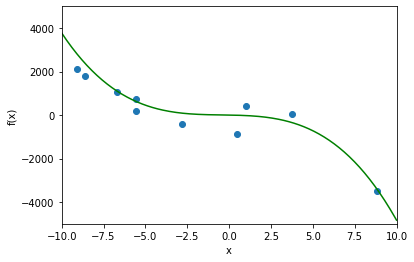

In [83]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

Predict: [ 3.73317007e+02  1.13377157e+01  6.11424559e+00  2.26133018e+03
 -1.45969434e+00  3.74446160e+02 -2.98901093e+02  7.84223102e+02
  1.86772782e+03 -3.41129429e+03]


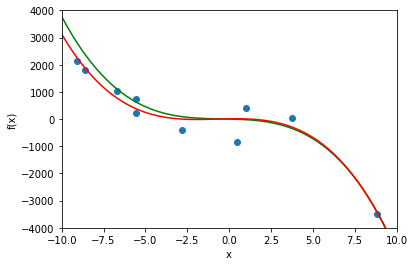

In [108]:
#c = 100
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-4000, 4000)
plt.xlim(-10, 10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)


model1 = polynomial_regression(max_power = 3, c = 100)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

print(f'Predict: {model1.predict(x_data)}')


Predict: [ 3.89186536e+02  3.57107324e-01 -8.86336549e+00  2.24602917e+03
  9.12788161e+00  3.90308048e+02 -3.29686536e+02  7.95475638e+02
  1.86016723e+03 -3.42140449e+03]


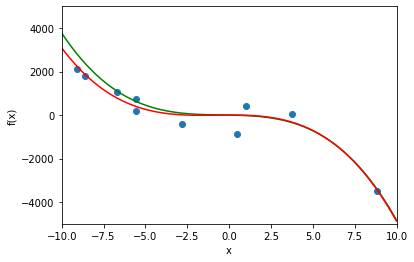

In [109]:
#c = 10
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)


model1 = polynomial_regression(max_power = 3, c = 10)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

print(f'Predict: {model1.predict(x_data)}')


Predict: [ 3.91789510e+02 -1.87796731e+00 -1.19413730e+01  2.24174793e+03
  1.10941334e+01  3.92908733e+02 -3.36511114e+02  7.96933527e+02
  1.85751809e+03 -3.42725712e+03]


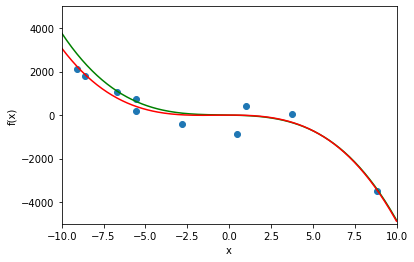

In [110]:
#c = 1
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)


model1 = polynomial_regression(max_power = 3, c = 1)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

print(f'Predict: {model1.predict(x_data)}')


Predict: [ 3.92063364e+02 -2.12032767e+00 -1.22755164e+01  2.24126830e+03
  1.13047724e+01  3.93182329e+02 -3.37258523e+02  7.97080517e+02
  1.85721615e+03 -3.42794239e+03]


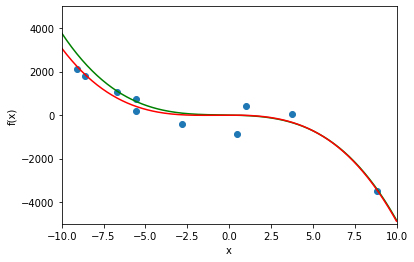

In [111]:
#c = 0.1
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)


model1 = polynomial_regression(max_power = 3, c = 0.1)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

print(f'Predict: {model1.predict(x_data)}')


Predict: [ 3.92090889e+02 -2.14476343e+00 -1.23092100e+01  2.24121978e+03
  1.13259834e+01  3.93209828e+02 -3.37333956e+02  7.97095222e+02
  1.85718555e+03 -3.42801200e+03]


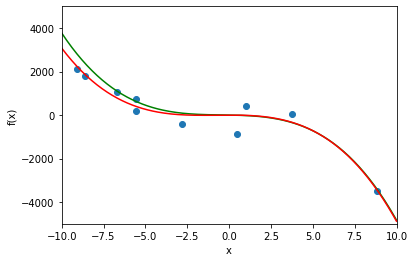

In [112]:
#c = 0.01
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)


model1 = polynomial_regression(max_power = 3, c = 0.01)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

print(f'Predict: {model1.predict(x_data)}')


Predict: [ 3.92093643e+02 -2.14720901e+00 -1.23125822e+01  2.24121493e+03
  1.13281059e+01  3.93212579e+02 -3.37341506e+02  7.97096693e+02
  1.85718249e+03 -3.42801897e+03]


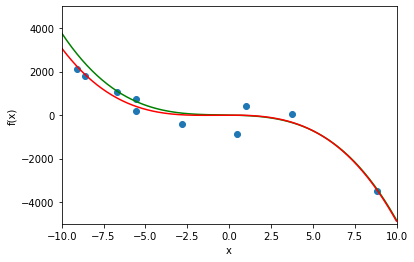

In [114]:
#c = 0.001
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)


model1 = polynomial_regression(max_power = 3, c = 0.001)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

print(f'Predict: {model1.predict(x_data)}')


Как видно из полученных данных, при коэффициенте с =0,1 L2-регуляризации дальнейшее снижение данного коэффициента не имеет смысла.